# Importing libraries and loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ai_df=pd.read_csv("Ai job posting.csv")

## Data pre-processing

In [2]:
ai_df['Year'] = ai_df['Year'].replace('2011-13', '2013')
ai_df= ai_df.sort_values(by='Number of AI Job Postings', ascending=False)

In [3]:
ai_df

,Number of AI Job Postings,Skill,Year
19,152201,Python (programming language),2023
18,133066,Computer science,2023
17,93541,SQL (programming language),2023
16,91883,Data analysis,2023
15,85480,Data science,2023
14,73069,Agile methodology,2023
13,68459,Amazon web services,2023
12,67772,Automation,2023
11,64557,Software engineering,2023
10,62180,Project management,2023


## Plot the first Graph of AI Job Postings data

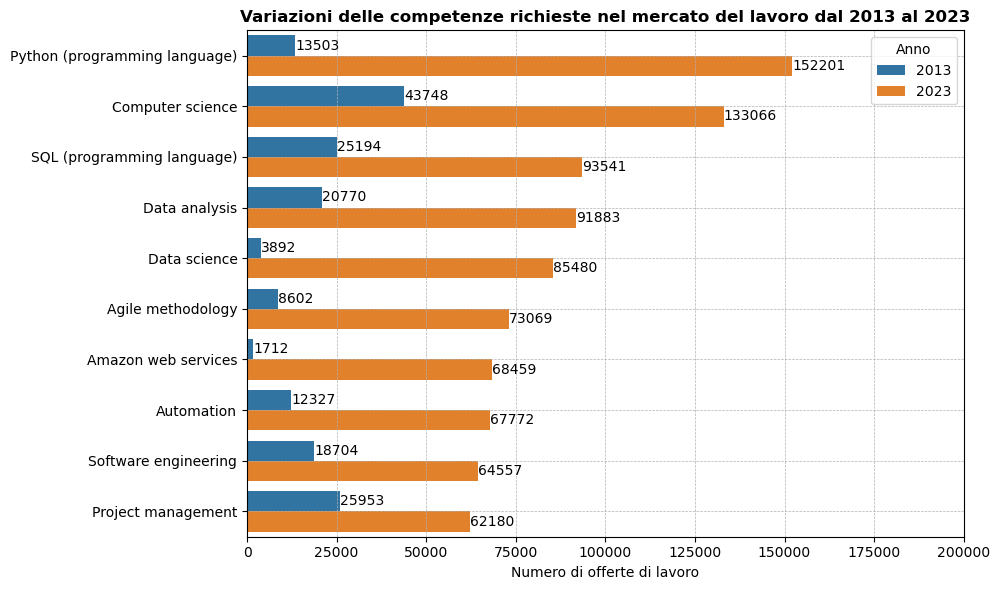

In [4]:
import seaborn as sns

# figure size configuration
plt.figure(figsize=(10,6))

ax=sns.barplot(data=ai_df,x="Number of AI Job Postings",y="Skill",hue="Year")
for i in ax.containers:
    ax.bar_label(i,) # place the labels in the graph
plt.title('Variazioni delle competenze richieste nel mercato del lavoro dal 2013 al 2023', weight="bold")
plt.xlabel('Numero di offerte di lavoro')
plt.ylabel('') 
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.xlim(0, 200000) #Change the x limit 
# Place a legend on the upper right side of the plot, with a smaller font size for better readability
plt.legend(title='Anno', loc='upper right', fontsize=10)

# Display the plot
plt.show() 

# Import AI investments data

In [5]:
import pandas as pd

Investment=pd.read_csv("Investimenti Ai.csv")

## Data trasformation

In [6]:
# Rename column to Italian
Investment = Investment.rename(columns={"Total investment (in billions of U.S. dollars)": "Investimenti in miliardi di dollari"})
# Calculate percentage change of investments
Investment['Variazione Percentuale'] = Investment["Investimenti in miliardi di dollari"].pct_change() * 100 

In [7]:
Investment

,Year,Investimenti in miliardi di dollari,Variazione Percentuale
0,2013,5.17,NaN
1,2014,9.56,84.912959
2,2015,13.35,39.644351
3,2016,17.13,28.314607
4,2017,25.72,50.145943
5,2018,43.10,67.573872
6,2019,58.18,34.988399
7,2020,64.02,10.037814
8,2021,132.36,106.747891
9,2022,103.40,-21.879722


In [8]:
# Convert investments to thousands of dollars
Investment["Investimenti in miliardi di dollari"]=Investment["Investimenti in miliardi di dollari"]*1000 

## Plot the second graph

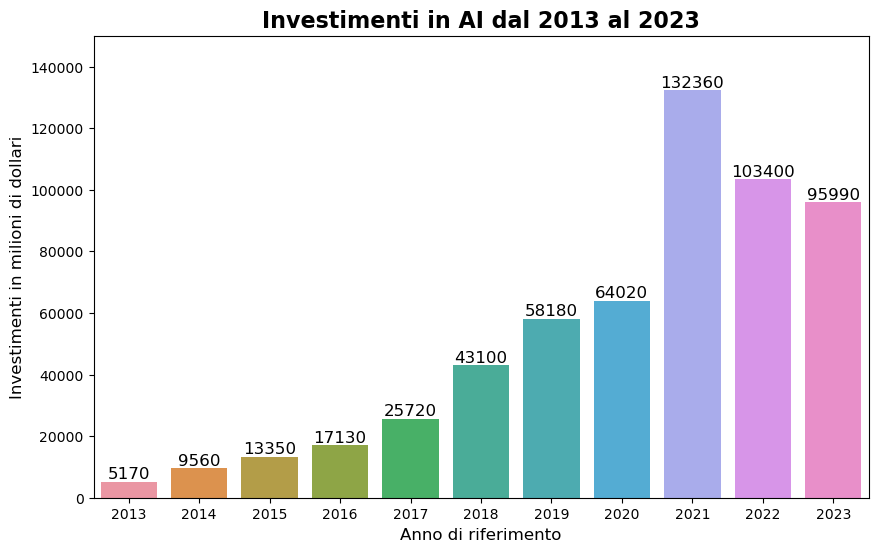

In [9]:
import seaborn as sns

plt.figure(figsize=(10,6))

ax=sns.barplot(data=Investment,x="Year",y="Investimenti in miliardi di dollari")
for i in ax.containers:
    ax.bar_label(i,fontsize=12)
plt.title('Investimenti in AI dal 2013 al 2023',fontsize=16,weight="bold")
plt.xlabel('Anno di riferimento', fontsize=12)
plt.ylabel('Investimenti in milioni di dollari', fontsize=12)
plt.ylim(0,150000) # change the y limit for more readability

# Display the plot
plt.show()

# Transformer neural network

In [10]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import random

# Carica il modello e il tokenizer GPT-2
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

def get_next_word_probabilities(prompt, top_k=5):
    """
    Data una sequenza di input, ottiene le probabilità delle top_k parole successive.

    Args:
        prompt (str): La sequenza di input.
        top_k (int): Il numero di parole con le probabilità più alte da restituire.

    Returns:
        list: Lista di tuple contenenti i token e le rispettive probabilità.
    """
    try:
        # Codifica il prompt di input
        inputs = tokenizer(prompt, return_tensors='pt')
        
        # Sposta il calcolo sulla GPU, se disponibile
        
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        
        # Ottieni i logit dal modello
        with torch.no_grad(): 
            outputs = model(**inputs)
        logits = outputs.logits
        
        # Considera solo l'ultima parola del prompt per le previsioni
        last_token_logits = logits[0, -1, :]
        
        # Applica softmax per ottenere le probabilità
        probabilities = torch.softmax(last_token_logits, dim=-1)
        
        # Ottieni i top_k token con le loro probabilità
        top_k_probabilities, top_k_indices = torch.topk(probabilities, top_k)
        
        # Converti gli indici dei token nei rispettivi token
        top_k_tokens = [tokenizer.decode([idx]).strip() for idx in top_k_indices]
        
        return list(zip(top_k_tokens, top_k_probabilities.cpu().detach().numpy()))
    except Exception as e:
        print(f"Errore durante la generazione delle probabilità: {e}")
        return []

def print_predictions(predictions):
    """
    Stampa le previsioni con le loro probabilità in un formato leggibile.

    Args:
        predictions (list): Lista di tuple contenenti i token e le rispettive probabilità.
    """
    for token, probability in predictions:
        print(f"Token: '{token}', Probability: {probability:.4f}")

## Some examples of tokenization

In [11]:
# Define the initial prompt
prompt = "The best thing about AI is its ability to"

# Get the top 5 next word predictions
predictions = get_next_word_probabilities(prompt, top_k=5)

# Print the predictions
print_predictions(predictions)


Token: 'learn', Probability: 0.0445
Token: 'predict', Probability: 0.0350
Token: 'make', Probability: 0.0319
Token: 'understand', Probability: 0.0308
Token: 'do', Probability: 0.0289


In [12]:
from googletrans import Translator

# Initialize the translator
translator = Translator()

# Define the initial prompt
prompt = "The best thing about AI is its ability to"

# Translate the initial prompt to Italian and print it
print("Frase data come input:", translator.translate(prompt, src="en", dest="it").text)

# Generate and append words to the prompt
for i in range(60):
    predictions = get_next_word_probabilities(prompt, top_k=3)
    word, probability = predictions[0]
    prompt = prompt + " " + word

# Print the generated prompt
print(prompt)

# Translate the generated prompt to Italian
tradotto = translator.translate(prompt, src="en", dest="it").text

# Print the translated prompt
print(f"{tradotto}")

Frase data come input: La cosa migliore di AI è la sua capacità di farlo
The best thing about AI is its ability to learn from experience . It 's not just a matter of learning from experience , it 's a matter of learning from the experience of the AI .                                
La cosa migliore di AI è la sua capacità di imparare dall'esperienza.Non è solo una questione di apprendimento dall'esperienza, è una questione di apprendimento dall'esperienza dell'IA.


# Nvidia time series analysis 

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define years and revenues
anni = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
ricavi = [3543, 4000, 3998, 4280, 4130, 4680, 5010, 6910, 9714, 11716, 10916, 16680, 26910, 26970, 60922]

# Calculate the standard deviation of revenues
np.std(ricavi)

14809.696903493108

## Plot the revenue trend graph

C:\Users\flavi\AppData\Local\Temp\ipykernel_38672\1098287858.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


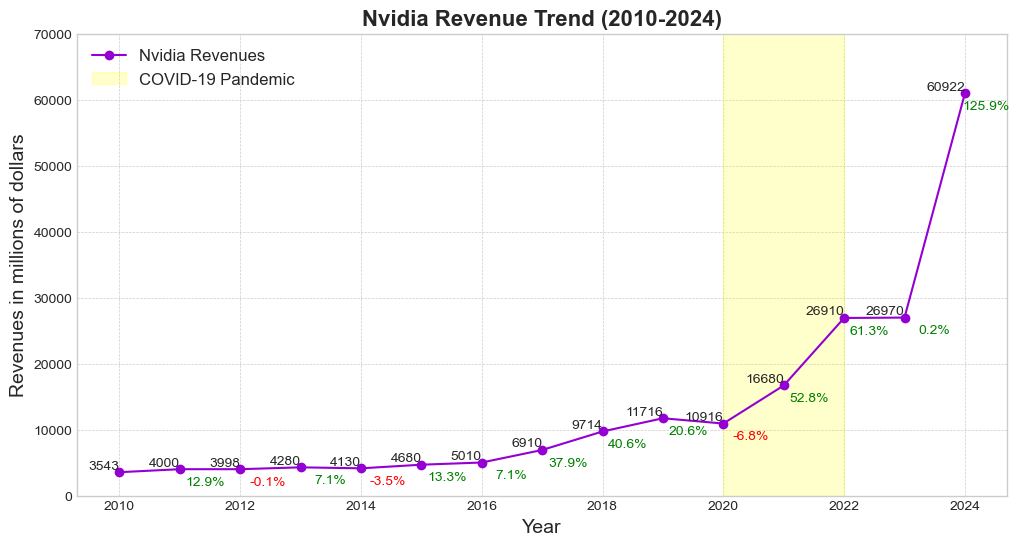

In [14]:
var_percent = []

# Calculate the percentage change in revenues
for i in range(1, len(ricavi)):
    var_percent.append(round((((ricavi[i] - ricavi[i - 1]) / ricavi[i - 1]) * 100), 1))

# Create the plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(anni, ricavi, marker='o', linestyle='-', color="darkviolet", label='Nvidia Revenues')

# Add title and labels
plt.title("Nvidia Revenue Trend (2010-2024)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Revenues in millions of dollars", fontsize=14)
plt.ylim(0, 70000)

# Highlight significant periods
plt.axvspan(2020, 2022, color='yellow', alpha=0.2, label='COVID-19 Pandemic')

# Add labels to data points
for i, (anno, ricavo) in enumerate(zip(anni, ricavi)):
    plt.text(anno, ricavo + 500, f'{ricavo:.0f}', fontsize=10, ha='right')

# Add percentage change labels
for i in range(1, len(anni)):
    color = 'green' if var_percent[i - 1] >= 0 else 'red'
    plt.text(anni[i] + 0.75, ricavi[i] - 2400, f'{var_percent[i - 1]:.1f}%', fontsize=10, ha='right', color=color)

# Add legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)

# Enhance general aesthetics

# Display the plot
plt.show()

## Revenue chart by sectors

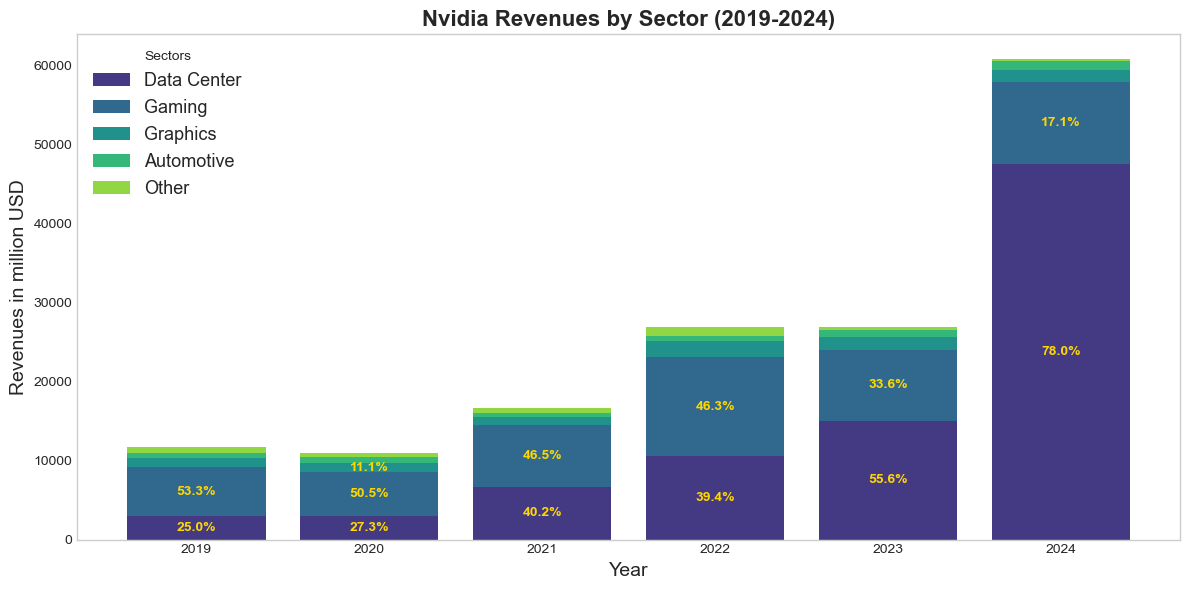

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue data by sector
data = {
    "Year": [2019, 2020, 2021, 2022, 2023, 2024],
    "Data Center (million USD)": [2932, 2983, 6696, 10613, 15005, 47525],
    "Gaming (million USD)": [6246, 5518, 7759, 12462, 9067, 10447],
    "Graphics (million USD)": [1130, 1212, 1053, 2111, 1544, 1553],
    "Automotive (million USD)": [641, 700, 536, 566, 903, 1091],
    "Other (million USD)": [767, 505, 631, 1162, 455, 306]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Settings for the plots
sectors = ["Data Center", "Gaming", "Graphics", "Automotive", "Other"]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 6))

# Use a color palette from Seaborn
colors = sns.color_palette("viridis", len(sectors))

# Calculate the percentages
totals = df[["Data Center (million USD)", "Gaming (million USD)", "Graphics (million USD)", "Automotive (million USD)", "Other (million USD)"]].sum(axis=1)
percentages = df[["Data Center (million USD)", "Gaming (million USD)", "Graphics (million USD)", "Automotive (million USD)", "Other (million USD)"]].div(totals, axis=0) * 100

# Stacked bar chart
bottom = [0] * len(df["Year"])
for i, (sector, color) in enumerate(zip(sectors, colors)):
    values = df[f"{sector} (million USD)"]
    ax.bar(df["Year"], values, label=sector, color=color, bottom=bottom)
    for j, (val, perc) in enumerate(zip(values, percentages[f"{sector} (million USD)"])):
        if perc >= 10:  # Add the percentage only if the value is greater than 10%
            ax.text(df["Year"][j], bottom[j] + val / 2, f"{perc:.1f}%", ha='center', va='center', color='gold', fontsize=10, fontweight='bold')
    bottom = [sum(x) for x in zip(bottom, values)]

# Add labels and title
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Revenues in million USD", fontsize=14)
ax.set_title("Nvidia Revenues by Sector (2019-2024)", fontsize=16, weight="bold")
ax.legend(title="Sectors", fontsize=13)
ax.grid(False)

# Save and display the plot
plt.tight_layout()
plt.show()

## Import the file on the historical performance of Nvidia shares

In [16]:
import numpy as np
import pandas as pd

data=pd.read_csv("PycharmProjects/pythonProject14/NVDA .csv")

data.describe(include='all')

,date,open,high,low,close,adj close,volume
count,6137,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6.137000e+03
unique,6137,NaN,NaN,NaN,NaN,NaN,NaN
top,2000-01-24,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.862609,5.969316,5.750864,5.867323,5.839910,6.219515e+08
std,NaN,14.125804,14.378140,13.850977,14.141514,14.144158,4.308542e+08
min,NaN,0.060833,0.065667,0.060000,0.061417,0.056333,4.564400e+07
25%,NaN,0.298250,0.304250,0.290250,0.297500,0.273104,3.619200e+08
50%,NaN,0.471750,0.478000,0.464250,0.471750,0.441223,5.200080e+08
75%,NaN,4.322500,4.404500,4.277500,4.326000,4.298005,7.460940e+08


In [17]:
# Show data dimension
data.shape

(6137, 7)

In [18]:
data["close"].var()

199.98241206998023

In [19]:
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract the year from the 'date' column and create a new 'year' column
data['year'] = data['date'].dt.year


## Plot time series graph of closing stock prices

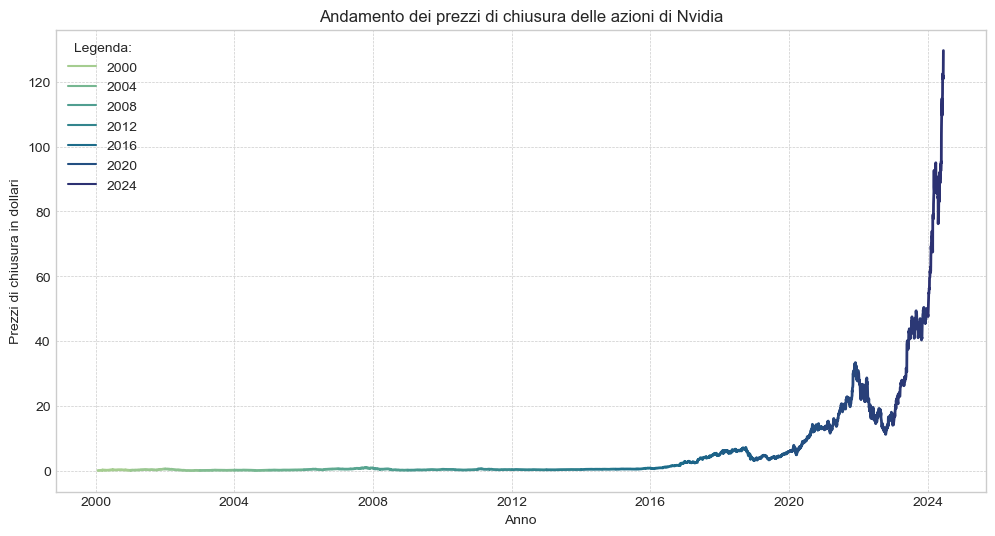

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt



# The color hue is set by the year of the data index, providing a color-coded trend over the years
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x="date", y='close', hue="year",palette="crest", linewidth=2 )

# Set the title of the plot and label the axes for clarity
plt.title('Andamento dei prezzi di chiusura delle azioni di Nvidia')
plt.xlabel('Anno')
plt.ylabel('Prezzi di chiusura in dollari')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Place a legend on the upper left side of the plot, with a smaller font size for better readability
plt.legend(title='Legenda:', loc='upper left', fontsize=10)

# Display the plot
plt.show()

In [21]:
# Calculate the exponentially moving average of the 'close' column with a span of 50 and store it in 'mean_rolling'
data['mean_rolling'] = data["close"].ewm(span=50, adjust=False).mean()

# Calculate the rolling standard deviation of the 'close' column with a window of 50 and store it in 'std_rolling'
data['std_rolling'] = data["close"].rolling(window=50).std()

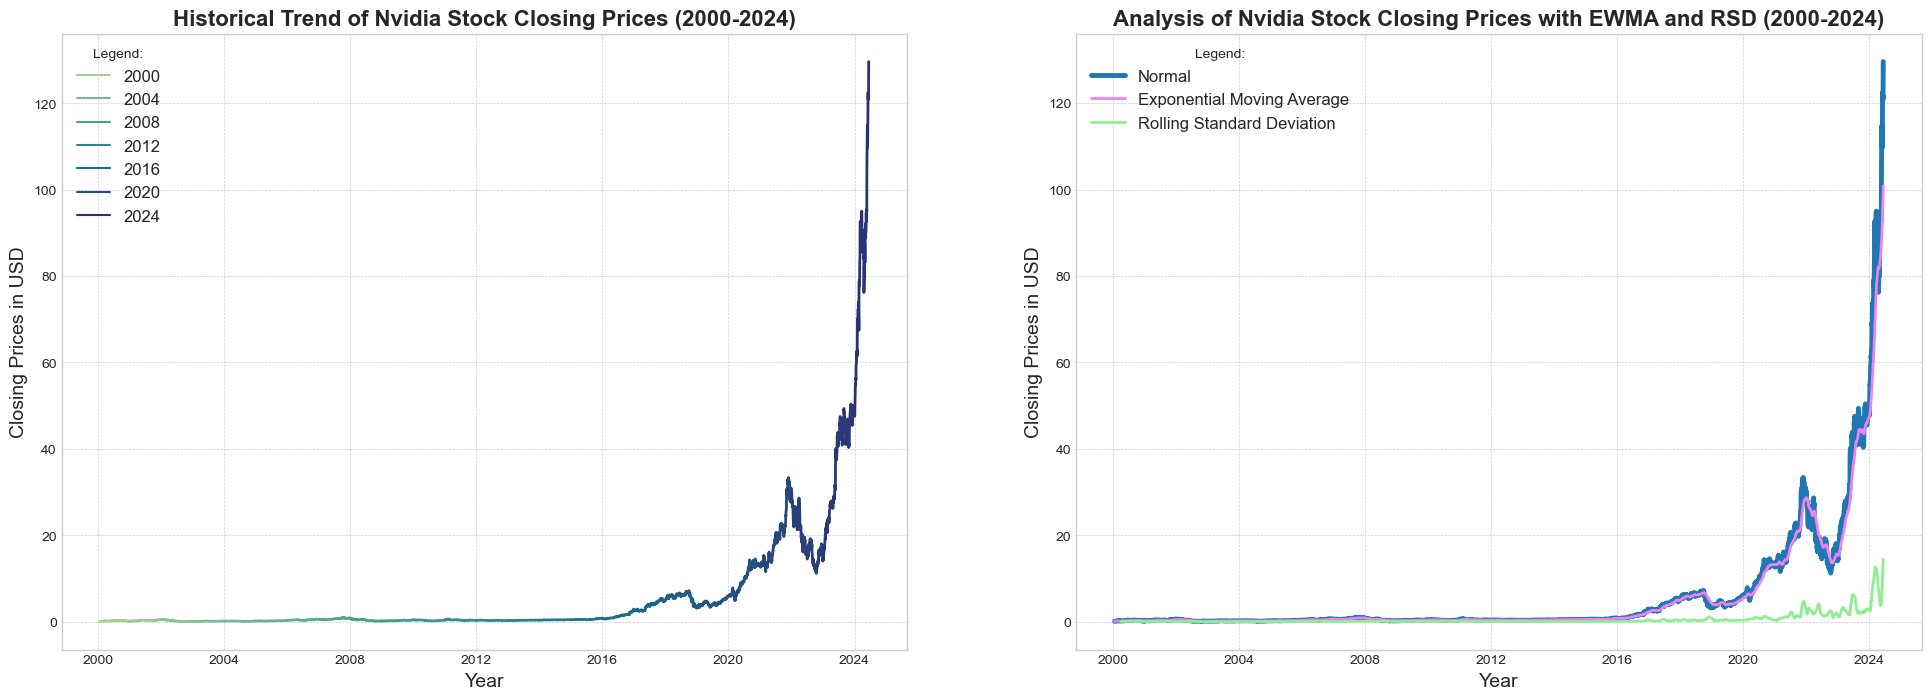

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots arranged side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))

# The color hue is set by the year of the data index, providing a color-coded trend over the years
sns.lineplot(data=data, x="date", y='close', hue="year", palette="crest", linewidth=2, ax=ax1)

# Set the title of the plot and label the axes for clarity
ax1.set_title('Historical Trend of Nvidia Stock Closing Prices (2000-2024)', fontsize=16, weight="bold")
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Closing Prices in USD', fontsize=14)
ax1.grid(True, which="both", ls="--", linewidth=0.5)
ax1.legend(title='Legend:', loc='upper left', fontsize=12)

# Line plot of the closing prices with additional lines for exponentially moving average and rolling standard deviation

sns.lineplot(data=data, x="date", y='close', linewidth=3.5, label="Normal", ax=ax2)
sns.lineplot(data=data, x="date", y='mean_rolling', color="violet", label="Exponential Moving Average", linewidth=2, ax=ax2)
sns.lineplot(data=data, x="date", y='std_rolling', color="lightgreen", label="Rolling Standard Deviation", linewidth=2, ax=ax2)

# Set the title of the plot and label the axes for clarity
ax2.set_title('Analysis of Nvidia Stock Closing Prices with EWMA and RSD (2000-2024)', fontsize=16, weight="bold")
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Closing Prices in USD', fontsize=14)
ax2.grid(True, which="both", ls="--", linewidth=0.5)
ax2.legend(title='Legend:', loc='upper left', fontsize=12)

# Display the plot
plt.show()

## Volume analysis

In [23]:
data["volume"].var()

1.8563534684323715e+17

In [24]:
# Apply the natural logarithm transformation to the volume column
data["volume"] = np.log(data["volume"])

## Plot the volume graph

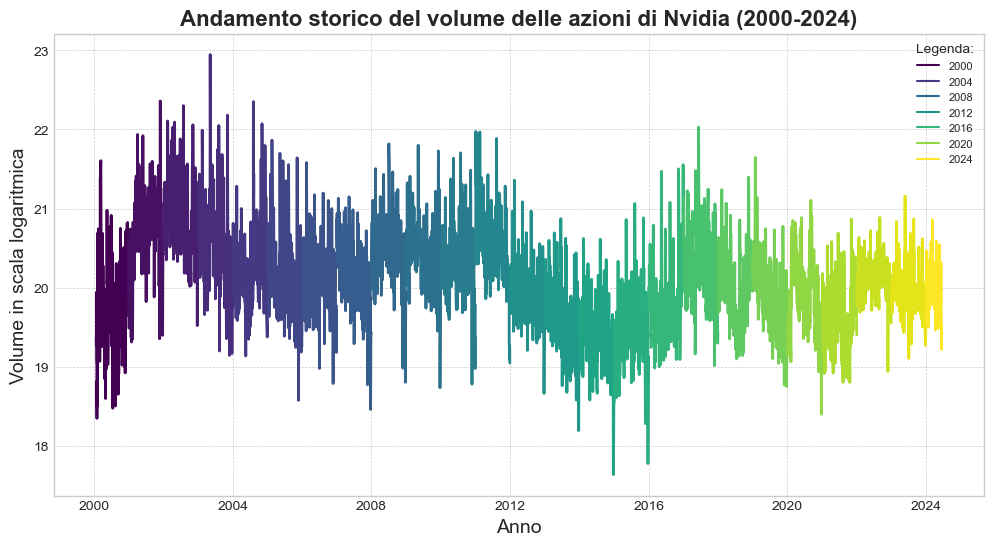

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# The color hue is set by the year of the data index, providing a color-coded trend over the years
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x="date", y='volume', hue="year",palette="viridis", linewidth=2 )

# Set the title of the plot and label the axes for clarity
plt.title('Andamento storico del volume delle azioni di Nvidia (2000-2024)',fontsize=16,weight="bold")
plt.xlabel('Anno',fontsize=14)
plt.ylabel('Volume in scala logaritmica',fontsize=14)
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Place a legend on the upper left side of the plot, with a smaller font size for better readability
plt.legend(title='Legenda:', loc='upper right', fontsize=8)

# Display the plot
plt.show()

# Data processing for LSTM model

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Initialize the MinMaxScaler to scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

# Extract the 'Close' prices as a numpy array and reshape it to be 2-dimensional
prices = data['close'].values.reshape(-1, 1)

# Fit the scaler to the closing prices and transform the data to the scaled version
prices_scaled = scaler.fit_transform(prices)

# Function to create sequences of data that will be used as the input to the LSTM model
def create_dataset(data, time_step=1):
    # X, Y are lists to hold the input/output data
    X, Y = [], []
    # Create sequences: a sequence of 'time_step' data points will be used to predict the next data point
    for i in range(len(data)-time_step-1):
        # Create the sequence of 'time_step' data points
        a = data[i:(i+time_step), 0]
        X.append(a)
        # Append the next data point that the sequence should predict
        Y.append(data[i + time_step, 0])
    # Return the sequences as numpy arrays
    return np.array(X), np.array(Y)

# Define the time_step for the sequences
time_step = 100

# Create the dataset with the specified time_step
X, y = create_dataset(prices_scaled, time_step)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to be in the form [samples, time steps, features], as required by LSTM network
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
X_train.shape, X_test.shape

((4828, 100, 1), (1208, 100, 1))

## Initialize LSTM model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Building a Sequential model for time series forecasting using LSTM
model = Sequential([
    # First LSTM layer with 'return_sequences=True' to pass the sequence to the next LSTM layer
    
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    
    # Dropout for regularization to prevent overfitting
    Dropout(0.5),
    # Second LSTM layer with 'return_sequences=False' to output only the last step of the sequence
    
    LSTM(50, return_sequences=False),
    
    # Dropout for regularization
    
    Dropout(0.5),
    
    # Dense layer with 15 neurons and ReLU activation function
    
    Dense(15, activation='relu'),
    
    # Output Dense layer with 1 neuron and linear activation function to predict the scaled closing price
    
    Dense(1, activation='linear')
])

# Output the summary of the model architecture
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 15)                765       
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 31381 (122.58 KB)
Trainable params: 31381

## Plot loss function trend

Epoch 1/30
61/61 [==============================] - 6s 58ms/step - loss: 4.0665e-04 - val_loss: 1.2131e-04
Epoch 2/30
61/61 [==============================] - 3s 48ms/step - loss: 4.2455e-04 - val_loss: 2.7006e-04
Epoch 3/30
61/61 [==============================] - 3s 48ms/step - loss: 3.5874e-04 - val_loss: 1.3097e-04
Epoch 4/30
61/61 [==============================] - 3s 49ms/step - loss: 3.5152e-04 - val_loss: 8.7102e-05
Epoch 5/30
61/61 [==============================] - 3s 49ms/step - loss: 3.3808e-04 - val_loss: 2.6161e-04
Epoch 6/30
61/61 [==============================] - 3s 48ms/step - loss: 3.1322e-04 - val_loss: 1.4611e-04
Epoch 7/30
61/61 [==============================] - 3s 49ms/step - loss: 3.7002e-04 - val_loss: 2.0933e-04
Epoch 8/30
61/61 [==============================] - 3s 49ms/step - loss: 2.7938e-04 - val_loss: 2.0593e-04
Epoch 9/30
61/61 [==============================] - 3s 49ms/step - loss: 3.2118e-04 - val_loss: 1.7055e-04
Epoch 10/30
61/61 [==================

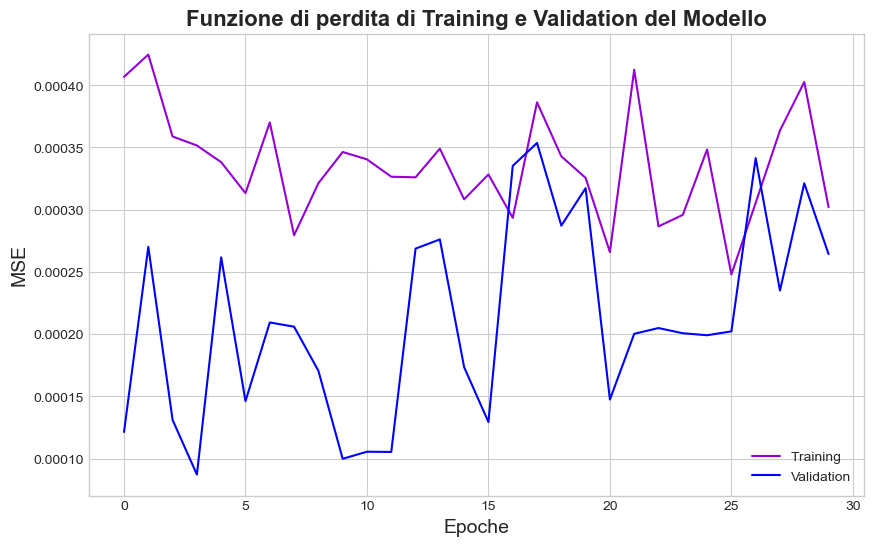

In [30]:
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Compile the LSTM model with the Adam optimizer and mean squared error loss function
# The learning rate is set to 0.001, which is a common starting point and may be adjusted based on performance.
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model on the training data for 30 epochs with a batch size of 64
# A validation split of 20% is used to monitor performance on unseen data during training
# 'verbose=1' outputs the training progress to the console
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.20, verbose=1)

# Plot the training and validation loss from the history object to visualize the learning process
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training ', color="darkviolet")
plt.plot(history.history['val_loss'], label='Validation', color="blue")
plt.title('Funzione di perdita di Training e Validation del Modello',fontsize=16,weight="bold")
plt.xlabel('Epoche', fontsize=14)
plt.ylabel('MSE',fontsize=14)
plt.legend()
plt.show()

## Predictions of model

In [31]:
# Use the trained model to make predictions on the training set
train_predict = model.predict(X_train).flatten() # Flatten the predictions to convert them from 2D to 1D array for easier handling

# Similarly, make predictions on the test set
test_predict = model.predict(X_test)

# Create a DataFrame to compare the actual closing prices and the model's predictions for the training set

# This is useful for visual evaluation of the model's performance on the training data
train_results = pd.DataFrame(data={'Train Predictions':scaler.inverse_transform(train_predict.reshape(-1,1)).flatten(),'Actuals':scaler.inverse_transform(y_train.reshape(-1,1)).flatten()})

train_results.head()  

38/38 [==============================] - 0s 12ms/step


,Train Predictions,Actuals
0,0.242183,0.162833
1,0.283626,0.299500
2,20.217291,22.212999
3,55.569698,61.527000
4,1.259264,2.444250


In [32]:
test_results = pd.DataFrame(data={'Test Predictions':scaler.inverse_transform(test_predict.reshape(-1,1)).flatten(),'Actuals':scaler.inverse_transform(y_test.reshape(-1,1)).flatten()})
test_results.head() 

,Test Predictions,Actuals
0,5.003914,6.008250
1,42.694492,44.680000
2,1.781566,3.472500
3,0.337828,0.530833
4,0.295528,0.335000


In [33]:
# Calculate RMSE to evaluate performance

import math
from sklearn.metrics import mean_squared_error
round(math.sqrt(mean_squared_error(y_train,train_predict)),2)

0.02

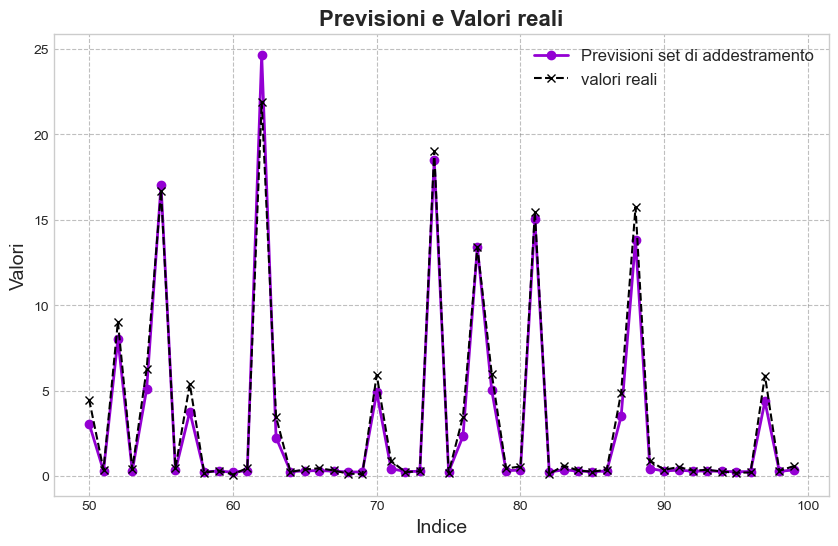

In [34]:
# Predictions and Actuals values plot 
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Dimensione del grafico
plt.plot(train_results['Train Predictions'][50:100], color='darkviolet', linestyle='-', marker='o', label='Previsioni set di addestramento',linewidth=2)
plt.plot(train_results['Actuals'][50:100], color='black', linestyle='--', marker='x', markersize=6, label='valori reali', linewidth=1.5)


plt.title('Previsioni e Valori reali', fontsize=16,weight="bold")
plt.xlabel('Indice', fontsize=14)
plt.ylabel('Valori', fontsize=14)

plt.legend(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5, color='gray')


plt.show()

# Bitcoin value trend analysis

In [35]:
import yfinance as yf
btc = yf.download("BTC-USD", start="2014-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [36]:
btc["Year"]=btc.index.year

## Plot the trend graph

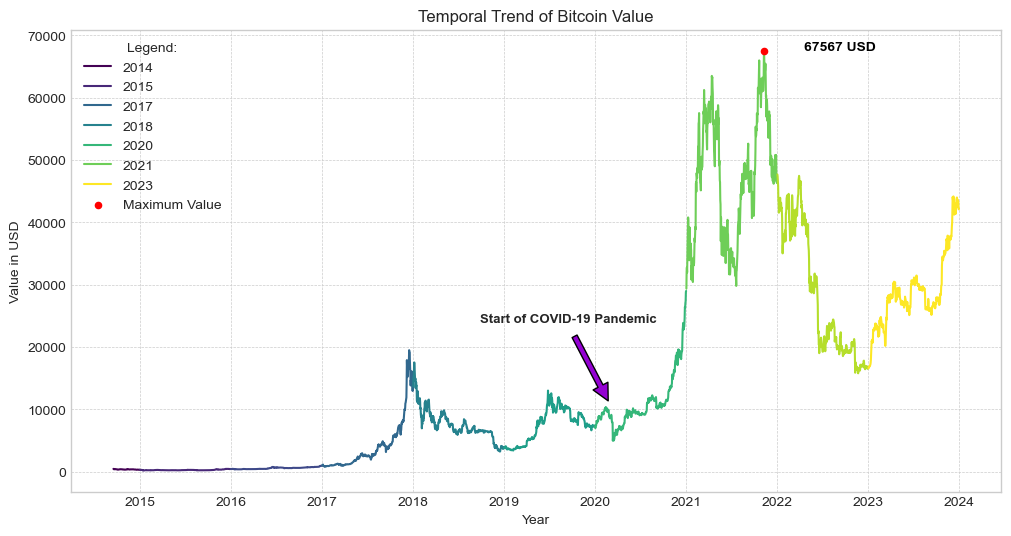

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a line plot of the closing prices for Bitcoin over the last 7 years
# The color hue is set by the year, providing a color-coded trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=btc, x="Date", y='Close', hue="Year", palette="viridis", linewidth=1.5)

# Set the title of the plot and label the axes for clarity
plt.title('Temporal Trend of Bitcoin Value')
plt.xlabel('Year')
plt.ylabel('Value in USD')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Mark the maximum value on the plot
max_date = pd.Timestamp('2021-11-08')
max_value = 67566.828125
plt.scatter(max_date, max_value, color='red', s=20, zorder=10, label="Maximum Value")
plt.text(max_date + pd.DateOffset(days=450), max_value, f'{max_value:.0f} USD', color='black', ha='right', weight="bold")

# Annotate the start of the COVID-19 pandemic
plt.annotate(
    'Start of COVID-19 Pandemic', 
    xy=(pd.Timestamp('2020-03-11'), 10011.317383), 
    xytext=(pd.Timestamp('2020-03-11') - pd.DateOffset(days=530), 24000), weight="bold", fontsize=9.5,  # Adjust these coordinates to make the arrow oblique
    arrowprops=dict(facecolor='darkviolet', shrink=0.1)
)

# Add a legend to the plot
plt.legend(title='Legend:', loc='upper left', fontsize=10)

# Display the plot
plt.show()

## Nvidia and Bitcoin correlation during Covid-19

In [38]:
import yfinance as yf

btc = yf.download("BTC-USD", start="2020-01-01", end="2022-12-31") # download Bitcoin data

nvda = yf.download("NVDA", start="2020-01-01", end="2022-12-31")  # download Nvidia data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [39]:
# Extract the closing prices
btc_close = btc['Close']
nvda_close = nvda['Close']

# Combine the data into a single DataFrame
data = pd.DataFrame({'Bitcoin': btc_close, 'Nvidia': nvda_close})

# Extract the year from the index and add it as a new column
data["Year"] = data.index.year

# Remove any NA values
data.dropna(inplace=True)

In [40]:
data.describe(include="all")

,Bitcoin,Nvidia,Year
count,756.000000,756.000000,756.000000
mean,28935.115210,15.982407,2020.997354
std,17134.634506,6.348385,0.817033
min,4970.788086,4.910000,2020.000000
25%,11660.983398,12.515625,2020.000000
50%,23362.715820,14.613250,2021.000000
75%,43169.005859,19.856625,2022.000000
max,67566.828125,33.375999,2022.000000


In [41]:
# Calculate and print the variance of Bitcoin and Nvidia closing prices, rounded to 2 decimal places
print(f"Bitcoin variance: {round(data['Bitcoin'].var(), 2)}, Nvidia closing price variance: {round(data['Nvidia'].var(), 2)}")

Bitcoin variance: 293595699.64, Nvidia closing price variance: 40.3


## Scatterplot of Nvidia and Bitcoin 

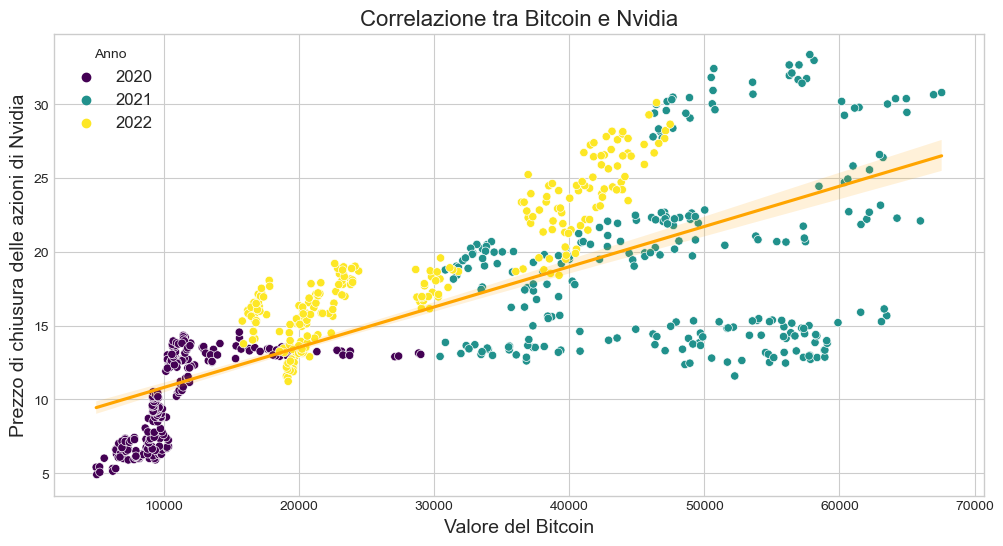

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Bitcoin', y='Nvidia', data=data,hue="Year",palette="viridis")
sns.regplot(x='Bitcoin', y='Nvidia', data=data, scatter=False, color='ORANGE')
# Set the title of the plot and label the axes for clarity
plt.title('Correlazione tra Bitcoin e Nvidia',fontsize=16)
plt.xlabel('Valore del Bitcoin',fontsize=14)
plt.ylabel('Prezzo di chiusura delle azioni di Nvidia',fontsize=14)
plt.grid(True)
plt.legend(title='Anno', loc='upper left', fontsize=12)

# Display the plot
plt.show()

## Show the correlation value

In [43]:
# Calculate the correlation between Bitcoin and Nvidia closing prices, rounded to 2 decimal places
correlation = round(data['Bitcoin'].corr(data['Nvidia']), 2)

# Print the correlation
print(f"Correlation between Bitcoin and Nvidia: {correlation}")

Correlation between Bitcoin and Nvidia: 0.74


# Nvidia VS Amd 

In [44]:
df=pd.read_excel("nvidia e amd.xlsx")

In [45]:
df

,Anno,Nvidia,Amd
0,2016,5.01,4.27
1,2017,6.91,5.33
2,2018,9.71,6.48
3,2019,11.72,6.73
4,2020,10.92,9.76
5,2021,16.68,16.43
6,2022,26.91,23.60
7,2023,26.97,22.68
8,2024,60.92,25.55


In [46]:
df["Nvidia"],df["Amd"]=df["Nvidia"]*1000,df["Amd"]*1000
df

,Anno,Nvidia,Amd
0,2016,5010.0,4270.0
1,2017,6910.0,5330.0
2,2018,9710.0,6480.0
3,2019,11720.0,6730.0
4,2020,10920.0,9760.0
5,2021,16680.0,16430.0
6,2022,26910.0,23600.0
7,2023,26970.0,22680.0
8,2024,60920.0,25550.0


In [47]:
# Reshape the DataFrame from wide format to long format
# 'Anno' is kept as the identifier variable
# 'Nvidia' and 'Amd' are unpivoted to create two new columns: 'Azienda' and 'Fatturato'

df = pd.melt(df, id_vars=['Anno'], value_vars=['Nvidia', 'Amd'], 
                  var_name='Azienda', value_name='Fatturato')

In [48]:
df

,Anno,Azienda,Fatturato
0,2016,Nvidia,5010.0
1,2017,Nvidia,6910.0
2,2018,Nvidia,9710.0
3,2019,Nvidia,11720.0
4,2020,Nvidia,10920.0
5,2021,Nvidia,16680.0
6,2022,Nvidia,26910.0
7,2023,Nvidia,26970.0
8,2024,Nvidia,60920.0
9,2016,Amd,4270.0


In [49]:
# Extract the 'Fatturato' values for Nvidia and AMD into separate dataset
nvd = df["Fatturato"][df["Azienda"] == "Nvidia"]
amd = df["Fatturato"][df["Azienda"] == "Amd"]

In [50]:
nvd,amd

(0     5010.0
 1     6910.0
 2     9710.0
 3    11720.0
 4    10920.0
 5    16680.0
 6    26910.0
 7    26970.0
 8    60920.0
 Name: Fatturato, dtype: float64,
 9      4270.0
 10     5330.0
 11     6480.0
 12     6730.0
 13     9760.0
 14    16430.0
 15    23600.0
 16    22680.0
 17    25550.0
 Name: Fatturato, dtype: float64)

## Arima Model for predictions 

In [51]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Define and fit the ARIMA model for Nvidia's 'Fatturato' time series
Arima_model = ARIMA(nvd, order=(5,1,0))
Arima_model_fit = Arima_model.fit()

# Define the number of steps to forecast
numb_step = 3

# Generate the forecast for the specified number of steps
forecast = Arima_model_fit.forecast(steps=numb_step)

# Create a new DataFrame with the forecasted values for the years 2025, 2026, and 2027
df_2 = pd.DataFrame({
    "Anno": [2025, 2026, 2027],
    "Azienda": ["Nvidia"] * 3,
    "Fatturato": np.round(forecast, 0)
})

C:\Users\flavi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\flavi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# Concatenate the original DataFrame with the new DataFrame containing forecasted values
df = pd.concat([df, df_2])

# Display the combined DataFrame
df

,Anno,Azienda,Fatturato
0,2016,Nvidia,5010.0
1,2017,Nvidia,6910.0
2,2018,Nvidia,9710.0
3,2019,Nvidia,11720.0
4,2020,Nvidia,10920.0
5,2021,Nvidia,16680.0
6,2022,Nvidia,26910.0
7,2023,Nvidia,26970.0
8,2024,Nvidia,60920.0
9,2016,Amd,4270.0


In [53]:
list(amd)

[4270.0, 5330.0, 6480.0, 6730.0, 9760.0, 16430.0, 23600.0, 22680.0, 25550.0]

In [54]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

Arima_model = ARIMA(list(amd), order=(3,1,0))
Arima_model_fit = Arima_model.fit()
                
numb_step = 3
forecast = Arima_model_fit.forecast(steps=numb_step)

df_2=pd.DataFrame({"Anno":[2025,2026,2027],"Azienda":["Amd"]*3,"Fatturato":np.round(forecast,0)})

C:\Users\flavi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [55]:
df=pd.concat([df,df_2])
df

,Anno,Azienda,Fatturato
0,2016,Nvidia,5010.0
1,2017,Nvidia,6910.0
2,2018,Nvidia,9710.0
3,2019,Nvidia,11720.0
4,2020,Nvidia,10920.0
5,2021,Nvidia,16680.0
6,2022,Nvidia,26910.0
7,2023,Nvidia,26970.0
8,2024,Nvidia,60920.0
9,2016,Amd,4270.0


## Plot AMD and Nvidia revenue comparison graph and forecast from 2025 to 2027

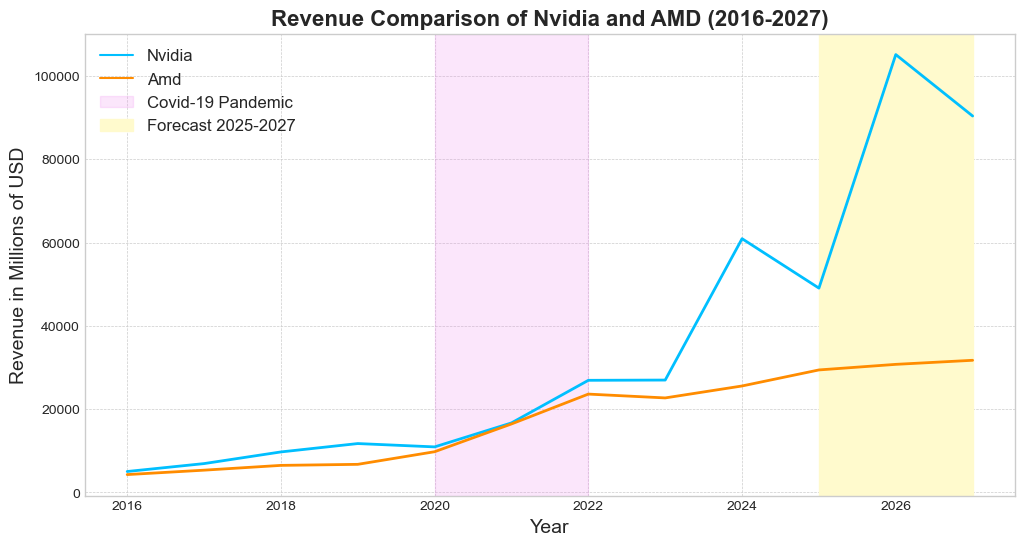

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the color palette for the plot
c = ["deepskyblue", "darkorange"]

# Create a figure with specified size
plt.figure(figsize=(12, 6))

# Create a line plot comparing the revenue of Nvidia and AMD over the years
sns.lineplot(data=df, x="Anno", y="Fatturato", hue="Azienda", palette=c, linewidth=2)

# Set the title and labels for the plot
plt.title("Revenue Comparison of Nvidia and AMD (2016-2027)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Revenue in Millions of USD", fontsize=14)

# Add grid lines to the plot
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Highlight the period of the Covid-19 pandemic
plt.axvspan(2020, 2022, color='violet', alpha=0.2, label='Covid-19 Pandemic')

# Highlight the forecasted period for 2025-2027
plt.axvspan(2025, 2027, color='#FFFACD', alpha=1, label='Forecast 2025-2027')

# Add a legend to the plot
plt.legend(loc='upper left', fontsize=12)

# Display the plot
plt.show()